In [16]:
import skimage.io as io
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image

In [11]:
# pip install scikit-image
# pip install tensorflow_datasets
# conda install -c anaconda tensorflow-datasets


In [31]:
# data path
path_to_depth = '../nyu_v2/nyu_depth_v2_labeled.mat'

# read mat file
f = h5py.File(path_to_depth)

# read 0-th image. original format is [3 x 640 x 480], uint8
data_img = f['images']

# read corresponding depth (aligned to the image, in-painted) of size [640 x 480], float64
data_depth = f['depths']

print(data_img.shape, data_depth.shape)

(1449, 3, 640, 480) (1449, 640, 480)


/opt/conda/envs/py37-tf2/lib/python3.7/site-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """


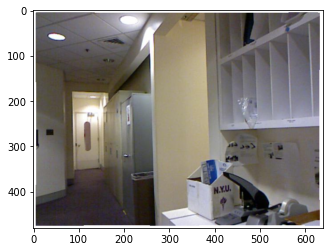

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


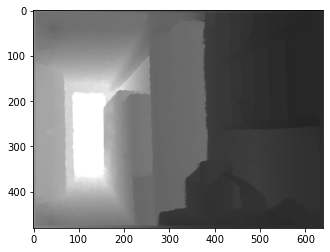

In [56]:
img_id = 11
img = data_img[img_id]
depth = data_depth[img_id]

# reshape
img_ = np.empty([480, 640, 3])
img_[:,:,0] = img[0,:,:].T
img_[:,:,1] = img[1,:,:].T
img_[:,:,2] = img[2,:,:].T

# imshow
img__ = img_.astype('float32')
plt.imshow(img__/255.0)
plt.show()

# reshape for imshow
depth_ = np.empty([480, 640, 3])
depth_[:,:,0] = depth[:,:].T
depth_[:,:,1] = depth[:,:].T
depth_[:,:,2] = depth[:,:].T

# plt.imshow(depth_/4.0)
plt.imshow(depth_/7.0)
plt.show()

In [37]:
im = Image.fromarray((img__).astype(np.uint8))
im.save("./input/img_11.png")

In [51]:
# !source activate py37-tf2
# !python run_monodepth.py -t dpt_large
# !python run_monodepth.py -t dpt_hybrid_nyu
# !python run_monodepth.py 
!python run_monodepth.py -t dpt_hybrid_nyu

/bin/sh: 1: source: not found
initialize
/home/siz075/.local/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
device: cpu
start processing
  processing input/img_11.png (1/1)
/home/siz075/.local/lib/python3.7/site-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for

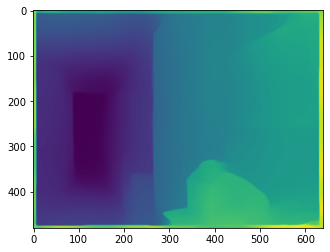

In [43]:
# reading png image file
im = matplotlib.image.imread('./output_monodepth/img_11.png')
  
# show image
plt.imshow(im)
plt.show()
# dpt_large

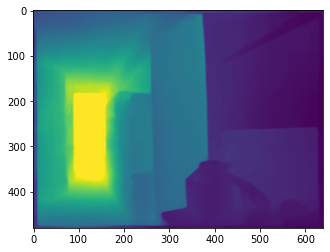

In [52]:
# reading png image file
im = matplotlib.image.imread('./output_monodepth/img_11.png')
  
# show image
plt.imshow(im)
plt.show()
# dpt_hybrid_nyu

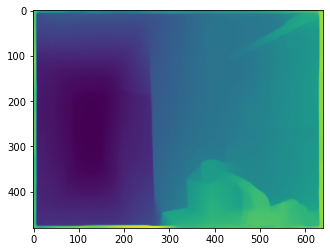

In [39]:
# reading png image file
im = matplotlib.image.imread('./output_monodepth/img_11.png')
  
# show image
plt.imshow(im)
plt.show()
# dpt_hybrid

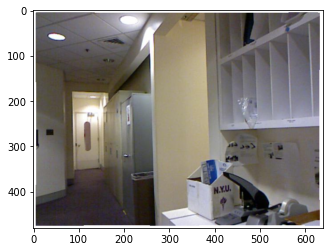

In [41]:
# reading png image file
im = matplotlib.image.imread('./input/img_11.png')
  
# show image
plt.imshow(im)
plt.show()